[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.2 Szenarien-Residuallast


In [50]:
# OPTIONAL: Load the "autoreload" extension so that code can change
#import config
import matplotlib.pyplot as plt
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from FLUCCOplus.notebooks import *



In [52]:
import FLUCCOplus.electricitymap as elmap
from FLUCCOplus.scenarios import Scenario, Names #Comparison

base_year = 2019 # 2015,2016, 2017, 2018, 2019
scenario_name = Names.flucco_2050_vol

base_scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Text(0.5, 0, '')

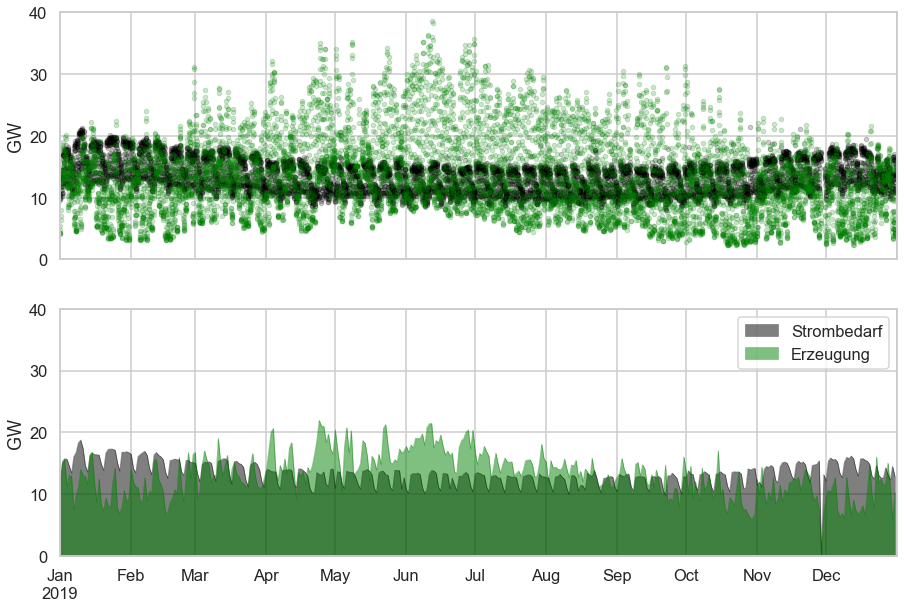

In [53]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)

scenario.plot_supplydemand(ax=ax[0], hourly=True, kind="line")
scenario.plot_supplydemand(ax=ax[1], daily=True, kind="area", legend=True)
[axx.set_ylabel("GW") for axx in ax]
ax[0].set_ylim(0,40)
ax[1].set_ylim(0,40)
ax[1].set_xlabel("")

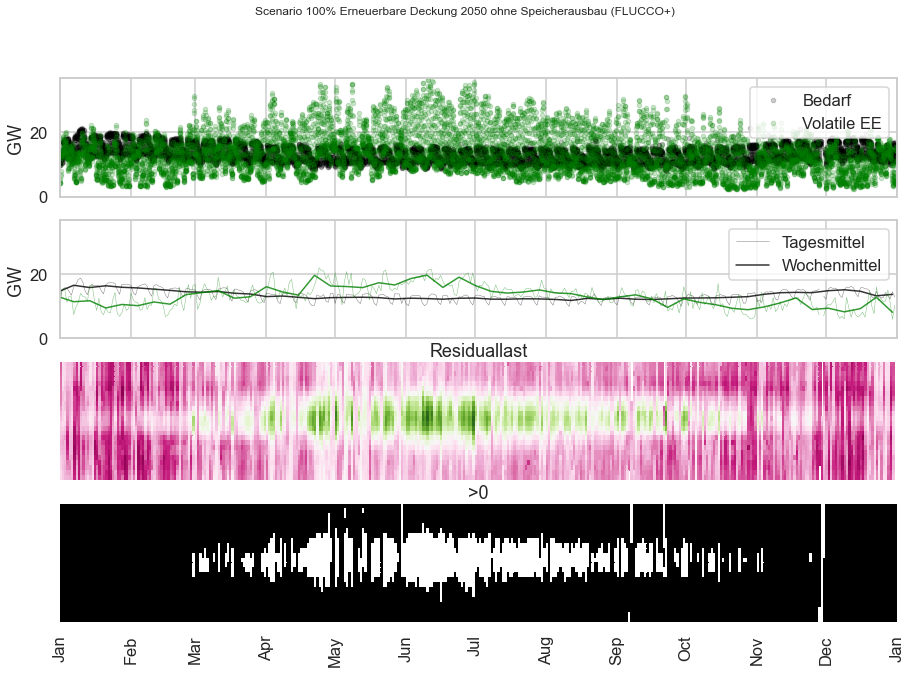

In [54]:
scenario.reset()
fig, ax = scenario.plot()

plt.savefig(config.PLOTS / "Lineares_Szenario.png", dpi=300)

In [55]:
scenario.TSD

,Strombedarf,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,Volatile EE,Erzeugung,RES0,RES1
datetime,,,,,,,,,
2019-01-01 00:00:00+00:00,10.387538,0.000000,3.499470,0.719090,0.0,4.218560,4.218560,-6.168978,-6.168978
2019-01-01 01:00:00+00:00,10.385867,0.000000,3.721961,0.531668,0.0,4.253628,4.253628,-6.132239,-6.132239
2019-01-01 02:00:00+00:00,9.832339,0.000000,3.724600,0.439869,0.0,4.164469,4.164469,-5.667870,-5.667870
2019-01-01 03:00:00+00:00,9.677684,0.000000,3.690290,0.623466,0.0,4.313757,4.313757,-5.363928,-5.363928
2019-01-01 04:00:00+00:00,9.974759,0.000000,3.620021,1.090110,0.0,4.710131,4.710131,-5.264628,-5.264628
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,13.774574,1.166586,3.683032,6.884903,0.0,10.567936,11.734522,-3.206639,-2.040053
2019-12-31 20:00:00+00:00,12.816790,0.615409,3.345542,7.485420,0.0,10.830962,11.446371,-1.985828,-1.370418
2019-12-31 21:00:00+00:00,12.779105,0.379490,3.205993,7.756991,0.0,10.962984,11.342474,-1.816121,-1.436631


In [56]:
scenario

100% Erneuerbare Deckung 2050 ohne Speicherausbau (FLUCCO+)

Szenario                target          base      scale
Jahr               2050.000000   2019.000000        NaN
Strombedarf      116723.788045  59624.184853   1.957658
Mismatch              0.000000           NaN        NaN
Importe               0.000000           NaN        NaN
Stromproduktion  116723.788045           NaN        NaN
Wasserkraft       49163.070888           NaN        NaN
Pumpspeicher       7909.142139   3538.865922   2.234937
Laufkraft         41253.928749  31262.205147   1.319610
Windkraft         30238.326513   7905.556000   3.824946
Photovoltaik      35376.805146   1326.625000  26.666771
Volatile EE      106869.060408           NaN        NaN
Nicht-Volatile     9854.727637           NaN        NaN
RES0               9854.727637           NaN        NaN
RES1               1945.585499           NaN        NaN
RES2              -7909.142139           NaN        NaN

<AxesSubplot:xlabel='datetime'>

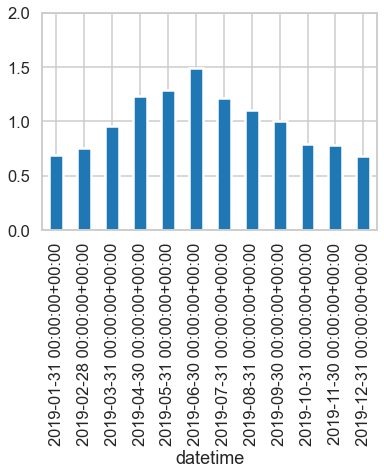

In [57]:
scenario.plot_monthly_mismatch()

<AxesSubplot:>

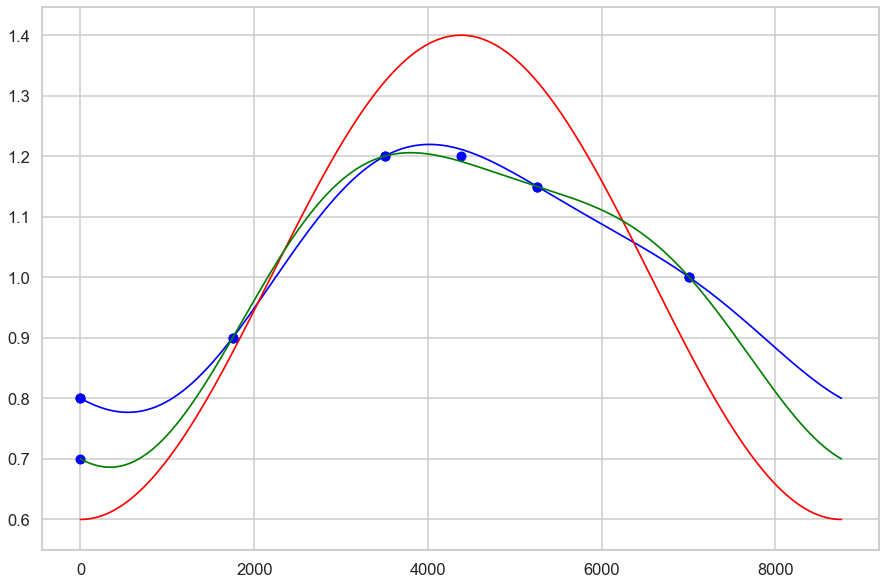

In [58]:
import FLUCCOplus.transform as traffo
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
fig,ax = plt.subplots(1,1, figsize = (15,10))
saisonale_speicher1.plot(ax=ax, line_color="blue")
saisonale_speicher2.plot(ax=ax, line_color="red")
saisonale_speicher3.plot(ax=ax, line_color="green")

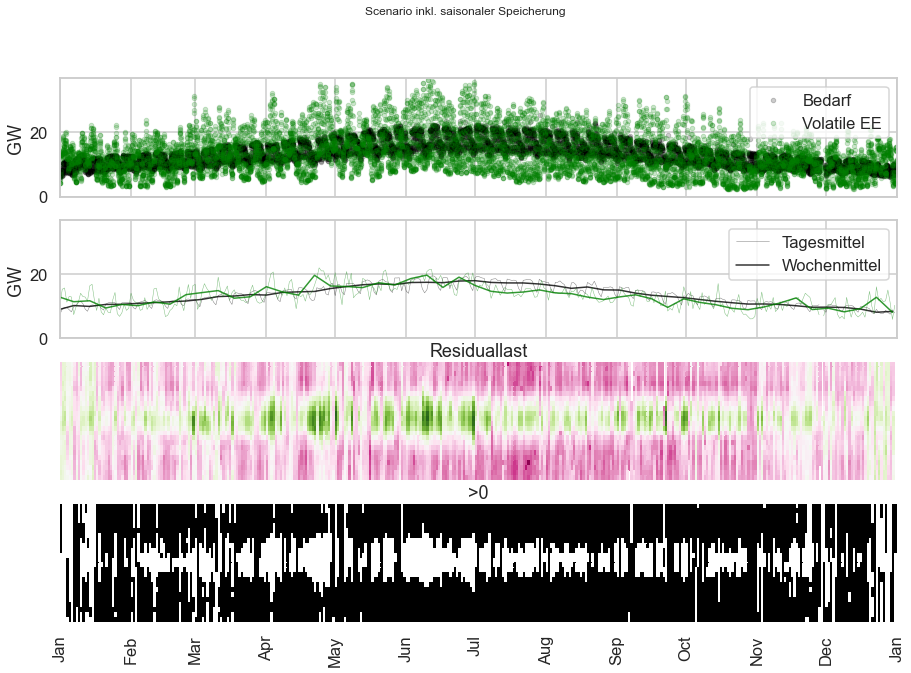

In [59]:
scenario.reset()
scenario.apply([saisonale_speicher2], reset=True)
fig, ax = scenario.plot()
fig.suptitle("Scenario inkl. saisonaler Speicherung");
plt.savefig(config.PLOTS / "Speicherszenario.png", dpi=300)

In [60]:

scenario.define_signal("RES0", separator=0.45)


(<Figure size 1080x360 with 3 Axes>,
 array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
        <AxesSubplot:xlabel='datetime'>], dtype=object))

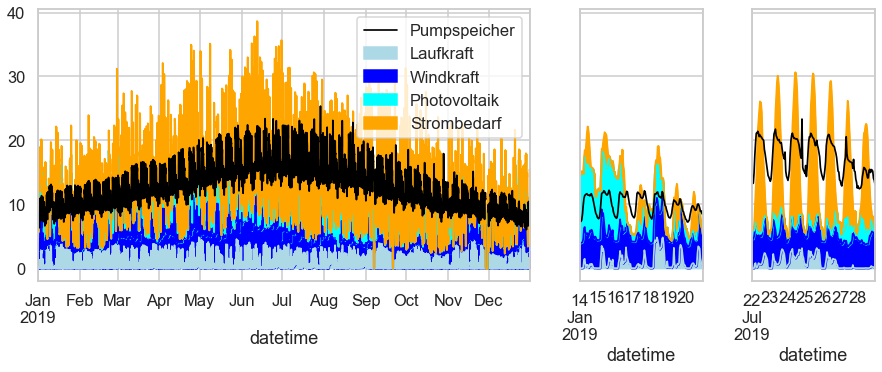

In [61]:

scenario.plot_energy_mix()


In [62]:
scenario.signal

datetime
2019-01-01 00:00:00+00:00    0.0
2019-01-01 01:00:00+00:00    0.0
2019-01-01 02:00:00+00:00    0.0
2019-01-01 03:00:00+00:00    0.0
2019-01-01 04:00:00+00:00    0.0
                            ... 
2019-12-31 19:00:00+00:00    1.0
2019-12-31 20:00:00+00:00    1.0
2019-12-31 21:00:00+00:00    1.0
2019-12-31 22:00:00+00:00    1.0
2019-12-31 23:00:00+00:00    1.0
Freq: H, Name: RES0, Length: 8760, dtype: float64

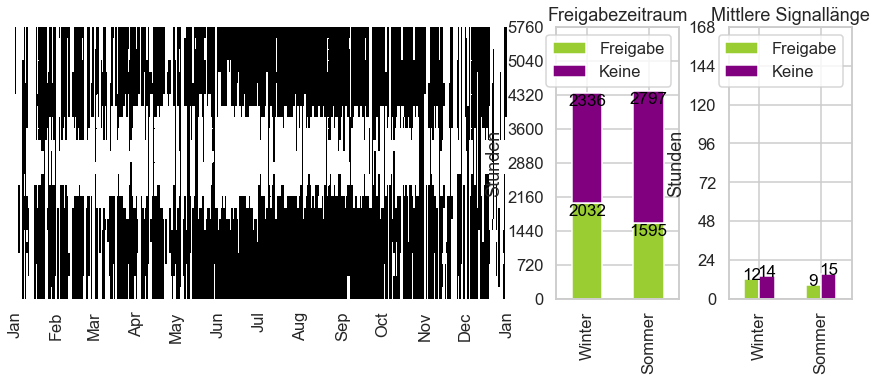

In [63]:
scenario.plot_signal();

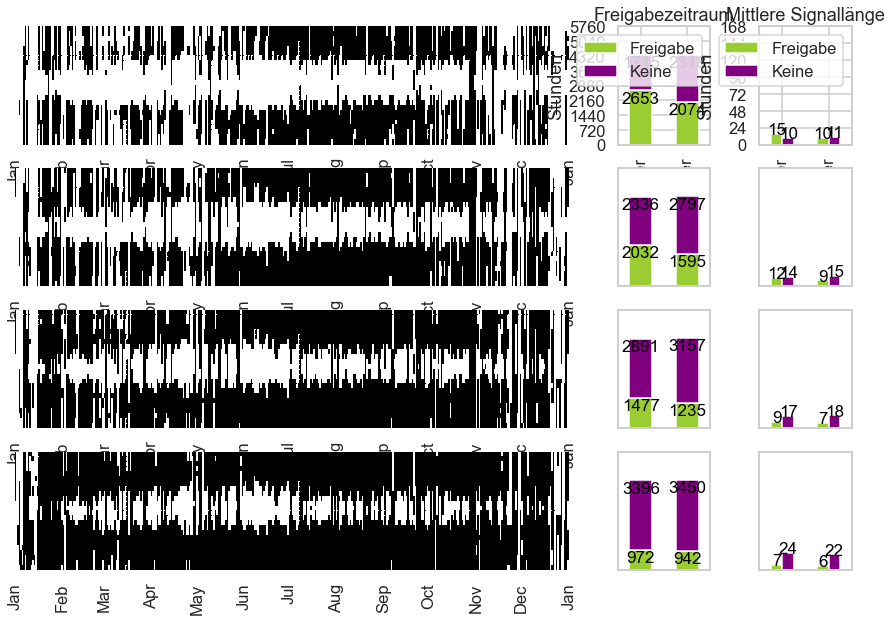

In [64]:
cutoffs = [0.4,0.45,0.5,0.55]

fig, ax = plt.subplots(4,3, figsize=(15,10), gridspec_kw={'width_ratios':[6,1,1]})
signals = pd.DataFrame()

for i, c in enumerate(cutoffs):
    scenario.define_signal("RES0", separator=c)
    scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
    signals[f"{c*100} %"] = scenario.signal

In [65]:
signals

,40.0 %,45.0 %,50.0 %,55.00000000000001 %
datetime,,,,
2019-01-01 00:00:00+00:00,1.0,0.0,0.0,0.0
2019-01-01 01:00:00+00:00,1.0,0.0,0.0,0.0
2019-01-01 02:00:00+00:00,1.0,0.0,0.0,0.0
2019-01-01 03:00:00+00:00,1.0,0.0,0.0,0.0
2019-01-01 04:00:00+00:00,1.0,0.0,0.0,0.0
...,...,...,...,...
2019-12-31 19:00:00+00:00,1.0,1.0,1.0,0.0
2019-12-31 20:00:00+00:00,1.0,1.0,1.0,0.0
2019-12-31 21:00:00+00:00,1.0,1.0,1.0,0.0


In [66]:
if not os.path.exists("../Data/interim"):
        os.makedirs("../Data/interim")

In [67]:
signals.to_csv(config.DATA_INTERIM / "RES0-40-55.csv", sep=";", decimal=",")

In [68]:
c1 = Comparison(base_scenario, scenario)

NameError: name 'Comparison' is not defined

In [ ]:

scenario2 = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)
